In [63]:
import numpy as np
try:
    import sionna
except ImportError as e:
    import os
    os.system("py -m pip install sionna")
    import sionna
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.linalg import hadamard
import random

In [64]:
tx_params = {
    "nUsers" : 3,
    "powerAllocation_dB" : 0,
    "nMessage" : 6,
    "nCodeCDMA" : 16,
    "codes" : [],
    "nGold" : 1024
}

In [65]:
'''
binary_source = sionna.utils.BinarySource()
channel = sionna.channel.AWGN()

ebn0 = np.arange(0, 21, 1)
nb_seq = 1
alpha = 0
ber_OnlyCode = np.zeros(len(ebn0))
ber_ChannelNoise = np.zeros(len(ebn0))
ber_ZeroForcing = np.zeros(len(ebn0))
xCorrNegative, xCorrOsef, xCorrPositive = utils.goldcode(tx_params["nGold"])

for i in range(len(ebn0)):

    ber_OnlyCode_i = np.zeros(nb_seq)
    ber_ChannelNoise_i = np.zeros(nb_seq)
    ber_ZeroForcing_i = np.zeros(nb_seq)
    var_noise = 1/(10**(0.1*ebn0[i]))

    for j in range(nb_seq):

        BinarySource = binary_source([tx_params["nUsers"], tx_params["nMessage"]]).numpy()

        data = BinarySource
        data_channel = utils.CDMA_encode(data, tx_params)

        signalOtherCells = np.zeros(data_channel.shape[0])
        for k in range(data_channel.shape[0]):
            signalOtherCells[k] = random.randint(0, 1)
        signalOtherCells = utils.Binary2PlusMinusOne(signalOtherCells, int)

        h = utils.Rayleigh_canal(alpha, len(data_channel))
        n = (1j*np.random.normal(scale=np.sqrt(var_noise/2),size=data_channel.shape) 
             + np.random.normal(scale=np.sqrt(var_noise/2),size=data_channel.shape))
        channel = data_channel*h + n + signalOtherCells*(xCorrPositive-xCorrNegative)/tx_params["nGold"]
        zero_forcing = channel/h

        decoded_OnlyCode = utils.CDMA_decode(data_channel, tx_params)
        decoded_ChannelNoise = utils.CDMA_decode(channel, tx_params)
        decoded_ZeroForcing = utils.CDMA_decode(zero_forcing, tx_params)

        decoded_tf_OnlyCode = tf.convert_to_tensor(decoded_OnlyCode)
        decoded_tf_ChannelNoise = tf.convert_to_tensor(decoded_ChannelNoise)
        decoded_tf_ZeroForcing = tf.convert_to_tensor(decoded_ZeroForcing)

        BinarySource = tf.cast(tf.less(0.0, BinarySource), tf.float32)
        decoded_tf_OnlyCode = tf.cast(tf.less(0.0, decoded_tf_OnlyCode), tf.float32)
        decoded_tf_ChannelNoise = tf.cast(tf.less(0.0, decoded_tf_ChannelNoise), tf.float32)
        decoded_tf_ZeroForcing = tf.cast(tf.less(0.0, decoded_tf_ZeroForcing), tf.float32)

        ber_OnlyCode_j = sionna.utils.metrics.compute_ber(BinarySource, decoded_tf_OnlyCode)
        ber_ChannelNoise_j = sionna.utils.metrics.compute_ber(BinarySource, decoded_tf_ChannelNoise)
        ber_ZeroForcing_j = sionna.utils.metrics.compute_ber(BinarySource, decoded_tf_ZeroForcing)

        ber_OnlyCode_i[j] = ber_OnlyCode_j.numpy()
        ber_ChannelNoise_i[j] = ber_ChannelNoise_j.numpy()
        ber_ZeroForcing_i[j] = ber_ZeroForcing_j.numpy()
        
    ber_OnlyCode[i] = np.mean(ber_OnlyCode_i)
    ber_ChannelNoise[i] = np.mean(ber_ChannelNoise_i)
    ber_ZeroForcing[i] = np.mean(ber_ZeroForcing_i)

    print("Eb/N0 = " + str(ebn0[i]) + ", " + " "*(i<10) 
          # + "BER_OnlyCode = " + str(ber_OnlyCode[i]) + ", " 
          + "BER_ChannelNoise = " + f"{ber_ChannelNoise[i]:.9f}" + ", "
          + "BER_ZeroForcing = " + f"{ber_ZeroForcing[i]:.9f}")

'''

'\nbinary_source = sionna.utils.BinarySource()\nchannel = sionna.channel.AWGN()\n\nebn0 = np.arange(0, 21, 1)\nnb_seq = 1\nalpha = 0\nber_OnlyCode = np.zeros(len(ebn0))\nber_ChannelNoise = np.zeros(len(ebn0))\nber_ZeroForcing = np.zeros(len(ebn0))\nxCorrNegative, xCorrOsef, xCorrPositive = utils.goldcode(tx_params["nGold"])\n\nfor i in range(len(ebn0)):\n\n    ber_OnlyCode_i = np.zeros(nb_seq)\n    ber_ChannelNoise_i = np.zeros(nb_seq)\n    ber_ZeroForcing_i = np.zeros(nb_seq)\n    var_noise = 1/(10**(0.1*ebn0[i]))\n\n    for j in range(nb_seq):\n\n        BinarySource = binary_source([tx_params["nUsers"], tx_params["nMessage"]]).numpy()\n\n        data = BinarySource\n        data_channel = utils.CDMA_encode(data, tx_params)\n\n        signalOtherCells = np.zeros(data_channel.shape[0])\n        for k in range(data_channel.shape[0]):\n            signalOtherCells[k] = random.randint(0, 1)\n        signalOtherCells = utils.Binary2PlusMinusOne(signalOtherCells, int)\n\n        h = utils.

In [66]:
'''
plt.figure()
# plt.semilogy(snr_db, ber_OnlyCode, "V-", label="CDMA_OnlyCode", color="black")
# plt.semilogy(ebn0, ber_ChannelNoise, "o-", label="CDMA_ChannelNoise", color="black")
plt.semilogy(ebn0, ber_ZeroForcing, "D-", label="CDMA_ZeroForcing", color="black")
ber_awgn = (1/2)*erfc(np.sqrt(10**(0.1*ebn0)/2))
plt.plot(ebn0, ber_awgn, label="AWGN", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("BER")
plt.xscale("linear")
plt.yscale("log")
plt.grid(which="both")
plt.legend()
plt.ylim([10**(-12), 0.8])
# plt.savefig("BER-SNR.png")
# plt.show()
'''

'\nplt.figure()\n# plt.semilogy(snr_db, ber_OnlyCode, "V-", label="CDMA_OnlyCode", color="black")\n# plt.semilogy(ebn0, ber_ChannelNoise, "o-", label="CDMA_ChannelNoise", color="black")\nplt.semilogy(ebn0, ber_ZeroForcing, "D-", label="CDMA_ZeroForcing", color="black")\nber_awgn = (1/2)*erfc(np.sqrt(10**(0.1*ebn0)/2))\nplt.plot(ebn0, ber_awgn, label="AWGN", color="black")\nplt.xlabel("SNR [dB]")\nplt.ylabel("BER")\nplt.xscale("linear")\nplt.yscale("log")\nplt.grid(which="both")\nplt.legend()\nplt.ylim([10**(-12), 0.8])\n# plt.savefig("BER-SNR.png")\n# plt.show()\n'

c:\Users\Dell\moi\Documents\_Q9\lelec2796\Project_noma-xdma\LELEC2796-Juju-Baba\utils.py:425: ComplexWarning: Casting complex values to real discards the imaginary part
  


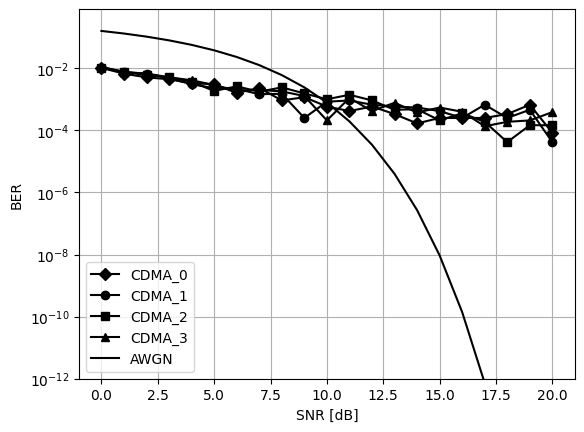

In [67]:
UE = [2, 4, 8, 16]

binary_source = sionna.utils.BinarySource()
channel = sionna.channel.AWGN()

ebn0 = np.arange(0, 21, 1)
nb_seq = 1000
alpha = 0
ber_OnlyCode = np.zeros(len(ebn0))
ber_ChannelNoise = np.zeros(len(ebn0))
ber_ZeroForcing = np.zeros(len(ebn0))
xCorrNegative, xCorrOsef, xCorrPositive = utils.goldcode(tx_params["nGold"])

plt.figure()
symbols = ["D-", "o-", "s-", "^-"]

# -------------------------------
def CDMA_encode(data, tx_params):

    nUsers = tx_params["nUsers"]
    nMessage = tx_params["nMessage"]
    nCodeCDMA = tx_params["nCodeCDMA"]
    data_out = np.zeros(nMessage*nCodeCDMA)

    for i in range(nUsers):
        data[i] = utils.Binary2PlusMinusOne(data[i], int)

    codes = utils.random_code(nUsers, nCodeCDMA, tx_params)
    
    for i in range(nUsers):
        for j in range(nMessage):
            data_out[j*nCodeCDMA:(j+1)*nCodeCDMA] += data[i][j]*codes[i]

    return data_out
# -------------------------------

for user in range(len(UE)):

    tx_params["nUsers"] = UE[user]

    for i in range(len(ebn0)):

        ber_OnlyCode_i = np.zeros(nb_seq)
        ber_ChannelNoise_i = np.zeros(nb_seq)
        ber_ZeroForcing_i = np.zeros(nb_seq)
        var_noise = 1/(10**(0.1*ebn0[i]))

        #print("user "+str(UE[user])+" ebn0 "+str(i))

        for j in range(nb_seq):

            BinarySource = binary_source([tx_params["nUsers"], tx_params["nMessage"]]).numpy()

            data = BinarySource
            data_channel = CDMA_encode(data, tx_params)

            signalOtherCells = np.zeros(data_channel.shape[0])
            for k in range(data_channel.shape[0]):
                signalOtherCells[k] = random.randint(0, 1)
            signalOtherCells = utils.Binary2PlusMinusOne(signalOtherCells, int)

            h = utils.Rayleigh_canal(alpha, len(data_channel))
            n = (1j*np.random.normal(scale=np.sqrt(var_noise/2),size=data_channel.shape) 
                + np.random.normal(scale=np.sqrt(var_noise/2),size=data_channel.shape))
            channel = data_channel*h + n + signalOtherCells*(xCorrPositive-xCorrNegative)/tx_params["nGold"]
            zero_forcing = channel/h

            decoded_OnlyCode = utils.CDMA_decode(data_channel, tx_params)
            decoded_ChannelNoise = utils.CDMA_decode(channel, tx_params)
            decoded_ZeroForcing = utils.CDMA_decode(zero_forcing, tx_params)

            decoded_tf_OnlyCode = tf.convert_to_tensor(decoded_OnlyCode)
            decoded_tf_ChannelNoise = tf.convert_to_tensor(decoded_ChannelNoise)
            decoded_tf_ZeroForcing = tf.convert_to_tensor(decoded_ZeroForcing)

            BinarySource = tf.cast(tf.less(0.0, BinarySource), tf.float32)
            decoded_tf_OnlyCode = tf.cast(tf.less(0.0, decoded_tf_OnlyCode), tf.float32)
            decoded_tf_ChannelNoise = tf.cast(tf.less(0.0, decoded_tf_ChannelNoise), tf.float32)
            decoded_tf_ZeroForcing = tf.cast(tf.less(0.0, decoded_tf_ZeroForcing), tf.float32)

            ber_OnlyCode_j = sionna.utils.metrics.compute_ber(BinarySource, decoded_tf_OnlyCode)
            ber_ChannelNoise_j = sionna.utils.metrics.compute_ber(BinarySource, decoded_tf_ChannelNoise)
            ber_ZeroForcing_j = sionna.utils.metrics.compute_ber(BinarySource, decoded_tf_ZeroForcing)

            ber_OnlyCode_i[j] = ber_OnlyCode_j.numpy()
            ber_ChannelNoise_i[j] = ber_ChannelNoise_j.numpy()
            ber_ZeroForcing_i[j] = ber_ZeroForcing_j.numpy()
            
        ber_OnlyCode[i] = np.mean(ber_OnlyCode_i)
        ber_ChannelNoise[i] = np.mean(ber_ChannelNoise_i)
        ber_ZeroForcing[i] = np.mean(ber_ZeroForcing_i)

    # plt.semilogy(snr_db, ber_OnlyCode, "V-", label="CDMA_OnlyCode", color="black")
    #plt.semilogy(ebn0, ber_ChannelNoise, "o-", label="CDMA_ChannelNoise", color="black")
    plt.semilogy(ebn0, ber_ZeroForcing, symbols[user], label="CDMA_"+str(UE[user]), color="black")
ber_awgn = (1/2)*erfc(np.sqrt(10**(0.1*ebn0)/2))
plt.plot(ebn0, ber_awgn, label="AWGN", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("BER")
plt.xscale("linear")
plt.yscale("log")
plt.grid(which="both")
plt.legend()
plt.ylim([10**(-12), 0.8])
plt.savefig("BER-SNR-UE.png")
plt.show()

tx_params["nUsers"] = 3

KeyboardInterrupt: 

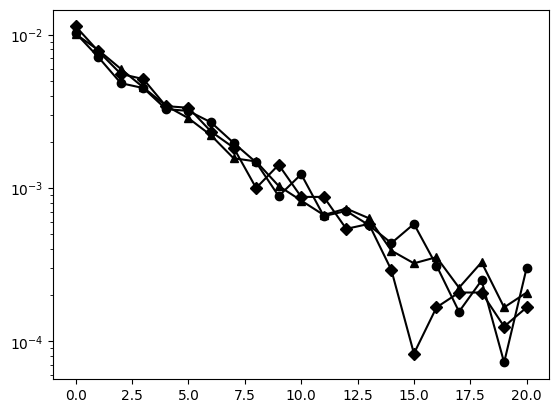

In [70]:
message = [8, 32, 64, 128]

binary_source = sionna.utils.BinarySource()
channel = sionna.channel.AWGN()

ebn0 = np.arange(0, 21, 1)
nb_seq = 1000
alpha = 0
ber_OnlyCode = np.zeros(len(ebn0))
ber_ChannelNoise = np.zeros(len(ebn0))
ber_ZeroForcing = np.zeros(len(ebn0))
xCorrNegative, xCorrOsef, xCorrPositive = utils.goldcode(tx_params["nGold"])

plt.figure()
symbols = ["D-", "o-", "^-", "s-"]
number=0

for mes in range(len(message)):

    tx_params["nMessage"] = message[mes]

    for i in range(len(ebn0)):

        ber_OnlyCode_i = np.zeros(nb_seq)
        ber_ChannelNoise_i = np.zeros(nb_seq)
        ber_ZeroForcing_i = np.zeros(nb_seq)
        var_noise = 1/(10**(0.1*ebn0[i]))

        #print("message "+str(message[mes])+" ebn0 "+str(i))

        for j in range(nb_seq):

            BinarySource = binary_source([tx_params["nUsers"], tx_params["nMessage"]]).numpy()

            data = BinarySource
            data_channel = CDMA_encode(data, tx_params)

            signalOtherCells = np.zeros(data_channel.shape[0])
            for k in range(data_channel.shape[0]):
                signalOtherCells[k] = random.randint(0, 1)
            signalOtherCells = utils.Binary2PlusMinusOne(signalOtherCells, int)

            h = utils.Rayleigh_canal(alpha, len(data_channel))
            n = (1j*np.random.normal(scale=np.sqrt(var_noise/2),size=data_channel.shape) 
                + np.random.normal(scale=np.sqrt(var_noise/2),size=data_channel.shape))
            channel = data_channel*h + n + signalOtherCells*(xCorrPositive-xCorrNegative)/tx_params["nGold"]
            zero_forcing = channel/h

            decoded_OnlyCode = utils.CDMA_decode(data_channel, tx_params)
            decoded_ChannelNoise = utils.CDMA_decode(channel, tx_params)
            decoded_ZeroForcing = utils.CDMA_decode(zero_forcing, tx_params)

            decoded_tf_OnlyCode = tf.convert_to_tensor(decoded_OnlyCode)
            decoded_tf_ChannelNoise = tf.convert_to_tensor(decoded_ChannelNoise)
            decoded_tf_ZeroForcing = tf.convert_to_tensor(decoded_ZeroForcing)

            BinarySource = tf.cast(tf.less(0.0, BinarySource), tf.float32)
            decoded_tf_OnlyCode = tf.cast(tf.less(0.0, decoded_tf_OnlyCode), tf.float32)
            decoded_tf_ChannelNoise = tf.cast(tf.less(0.0, decoded_tf_ChannelNoise), tf.float32)
            decoded_tf_ZeroForcing = tf.cast(tf.less(0.0, decoded_tf_ZeroForcing), tf.float32)

            ber_OnlyCode_j = sionna.utils.metrics.compute_ber(BinarySource, decoded_tf_OnlyCode)
            ber_ChannelNoise_j = sionna.utils.metrics.compute_ber(BinarySource, decoded_tf_ChannelNoise)
            ber_ZeroForcing_j = sionna.utils.metrics.compute_ber(BinarySource, decoded_tf_ZeroForcing)

            ber_OnlyCode_i[j] = ber_OnlyCode_j.numpy()
            ber_ChannelNoise_i[j] = ber_ChannelNoise_j.numpy()
            ber_ZeroForcing_i[j] = ber_ZeroForcing_j.numpy()
            
        ber_OnlyCode[i] = np.mean(ber_OnlyCode_i)
        ber_ChannelNoise[i] = np.mean(ber_ChannelNoise_i)
        ber_ZeroForcing[i] = np.mean(ber_ZeroForcing_i)

    # plt.semilogy(snr_db, ber_OnlyCode, "V-", label="CDMA_OnlyCode", color="black")
    #plt.semilogy(ebn0, ber_ChannelNoise, "o-", label="CDMA_ChannelNoise", color="black")
    plt.semilogy(ebn0, ber_ZeroForcing, symbols[number], label="CDMA_"+str(mes), color="black")
    number+=1
ber_awgn = (1/2)*erfc(np.sqrt(10**(0.1*ebn0)/2))
plt.plot(ebn0, ber_awgn, label="AWGN", color="black")
plt.xlabel("SNR [dB]")
plt.ylabel("BER")
plt.xscale("linear")
plt.yscale("log")
plt.grid(which="both")
plt.legend()
plt.ylim([10**(-12), 0.8])
plt.savefig("BER-SNR-message.png")
plt.show()

tx_params["nMessage"] = 6